In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [63]:
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true=y_true, y_pred=tf.squeeze(y_pred));

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_true=y_true, y_pred=tf.squeeze(y_pred));

  
def plot_pred(test_data,
            test_labels,
            predictions):
  
  plt.figure(figsize=(10,10))
  plt.plot(test_data, test_labels, c="b", label="Test_set" )
  plt.plot(test_data, predictions, c="r", label="Predictions")
  plt.legend();

In [4]:
x = tf.range(-100, 100, 5)
y = 5*x + 10
x, y

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
         -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
          10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
          65,   70,   75,   80,   85,   90,   95], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-490, -465, -440, -415, -390, -365, -340, -315, -290, -265, -240,
        -215, -190, -165, -140, -115,  -90,  -65,  -40,  -15,   10,   35,
          60,   85,  110,  135,  160,  185,  210,  235,  260,  285,  310,
         335,  360,  385,  410,  435,  460,  485], dtype=int32)>)

In [5]:
x_train = x[:30]
x_test = x[30:]

y_train = y[:30]
y_test = y[30:]

x_train, x_test, y_train, y_test

(<tf.Tensor: shape=(30,), dtype=int32, numpy=
 array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
         -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
          10,   15,   20,   25,   30,   35,   40,   45], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95], dtype=int32)>,
 <tf.Tensor: shape=(30,), dtype=int32, numpy=
 array([-490, -465, -440, -415, -390, -365, -340, -315, -290, -265, -240,
        -215, -190, -165, -140, -115,  -90,  -65,  -40,  -15,   10,   35,
          60,   85,  110,  135,  160,  185,  210,  235], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([260, 285, 310, 335, 360, 385, 410, 435, 460, 485], dtype=int32)>)

>**Model 1 with MAE**

In [ ]:
model = tf.keras.Sequential([
   tf.keras.Input(shape=(1)),
   tf.keras.layers.Dense(10, name="hidden_layer_1"),
   tf.keras.layers.Dense(10, name="hidden_layer_2"),
   tf.keras.layers.Dense(1, name="output_layer")  
], name="model_1")

model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics="MAE")


In [ ]:
plot_model(model=model, show_shapes=1)

In [ ]:
model.summary()

In [ ]:
model.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
model.predict([100])

array([[502.64798]], dtype=float32)

In [ ]:
y_pred = model.predict(x_test)
y_pred, y_pred.ndim

(array([[255.37863],
        [280.10553],
        [304.83252],
        [329.5594 ],
        [354.28638],
        [379.01328],
        [403.74026],
        [428.46716],
        [453.1941 ],
        [477.92108]], dtype=float32), 2)

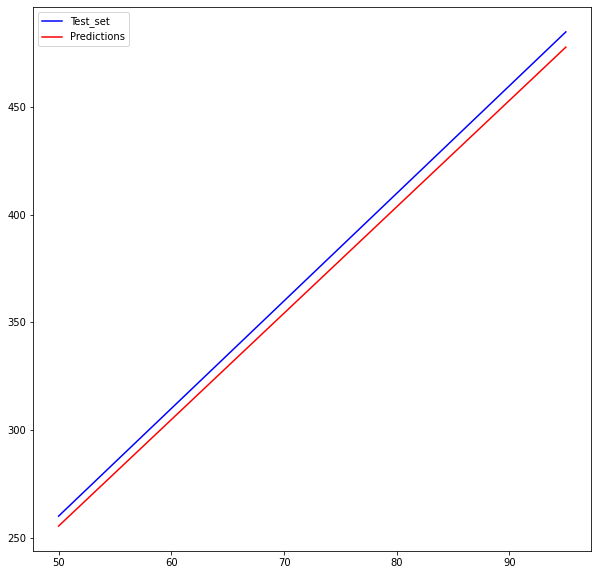

In [ ]:
plot_pred(x_test, y_test, y_pred)

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 139ms/step - loss: 5.8502 - MAE: 5.8502


[5.850167751312256, 5.850167751312256]

In [ ]:
mae(y_test, y_pred), tf.keras.losses.mae(y_test, y_pred.flatten())

(<tf.Tensor: shape=(), dtype=float32, numpy=5.8501678>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.8501678>)

>**Model 2 with MSE**

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(1)),
    tf.keras.layers.Dense(10, name="hidden_layer_1"),
    tf.keras.layers.Dense(10, name="hidden_layer_2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_2")

model_2.compile(loss=tf.keras.losses.MSE,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics="MSE")                  

In [ ]:
model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
plot_model(model_2, show_shapes=1)

In [ ]:
model_2.predict([100])

array([[490.28683]], dtype=float32)

In [ ]:
y_pred2 = model_2.predict([x_test])
y_pred2

array([[245.48747],
       [269.96738],
       [294.44733],
       [318.92725],
       [343.4072 ],
       [367.88715],
       [392.36713],
       [416.84705],
       [441.327  ],
       [465.80692]], dtype=float32)

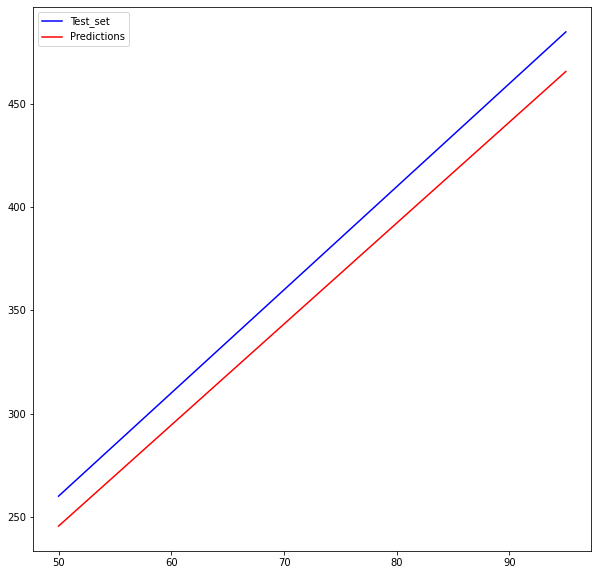

In [ ]:
plot_pred(x_test, y_test, y_pred2)

In [ ]:
model_2.evaluate(x_test, y_test)

1/1 [==============================] - 0s 113ms/step - loss: 286.2487 - MSE: 286.2487


[286.2486877441406, 286.2486877441406]

In [ ]:
mse(y_test, y_pred2), tf.keras.losses.mse(y_test, y_pred2.flatten())

(<tf.Tensor: shape=(), dtype=float32, numpy=243.93396>,
 <tf.Tensor: shape=(), dtype=float32, numpy=243.93396>)

>**Model 3 with 500 epochs**

In [45]:
model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(1)),
    tf.keras.layers.Dense(10, name="hidden_layer_1"),
    tf.keras.layers.Dense(10, name="hidden_layer_2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_3")

model_3.compile(loss=tf.keras.losses.MSE,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics="MSE")


In [46]:
model_3.fit(x_train, y_train, epochs=500, verbose=0)

In [ ]:
plot_model(model_3, show_shapes=1)

In [ ]:
model_3.summary()

In [48]:
model_3.predict([100])

array([[509.5147]], dtype=float32)

In [49]:
y_pred3 = model_3.predict([x_test])
y_pred3

array([[259.63745],
       [284.62518],
       [309.6129 ],
       [334.60065],
       [359.58835],
       [384.57608],
       [409.56384],
       [434.55157],
       [459.53925],
       [484.527  ]], dtype=float32)

In [ ]:
plot_pred(x_test, y_test, y_pred3)

In [50]:
model_3.evaluate(x_test, y_test)

1/1 [==============================] - 0s 134ms/step - loss: 0.1758 - MSE: 0.1758


[0.17577463388442993, 0.17577463388442993]

In [53]:
mse(y_test, y_pred3), tf.keras.losses.mse(y_test, y_pred3.flatten())

(<tf.Tensor: shape=(), dtype=float32, numpy=0.17577463>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.17577463>)

In [ ]:
model_3.save("/content/drive/MyDrive/Colab Notebooks/Saved Models/simple_test_LR_model.h5")

In [ ]:
savedmodel = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Saved Models/simple_test_LR_model.h5")
savedmodel.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 10)                20        
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 10)                110       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
savedmodel.predict(x_test) == model_3.predict(x_test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

###EXTRAS

In [17]:
x_t = tf.reshape(x_train, shape=(len(x_train), 1))
x_t

<tf.Tensor: shape=(30, 1), dtype=int32, numpy=
array([[-100],
       [ -95],
       [ -90],
       [ -85],
       [ -80],
       [ -75],
       [ -70],
       [ -65],
       [ -60],
       [ -55],
       [ -50],
       [ -45],
       [ -40],
       [ -35],
       [ -30],
       [ -25],
       [ -20],
       [ -15],
       [ -10],
       [  -5],
       [   0],
       [   5],
       [  10],
       [  15],
       [  20],
       [  25],
       [  30],
       [  35],
       [  40],
       [  45]], dtype=int32)>

In [56]:

model_t = tf.keras.Sequential([
   tf.keras.Input(shape=(1)),
   tf.keras.layers.Dense(10, name="hidden_layer_1"),
   tf.keras.layers.Dense(10, name="hidden_layer_2"),
   tf.keras.layers.Dense(1, name="output_layer")  
], name="model_1")

optimizer= tf.keras.optimizers.SGD()


In [59]:
prediction = model_t(x_t)


<tf.Tensor: shape=(30,), dtype=float32, numpy=
array([ 57.572662 ,  54.69403  ,  51.8154   ,  48.93677  ,  46.058136 ,
        43.1795   ,  40.30087  ,  37.42223  ,  34.5436   ,  31.66497  ,
        28.786331 ,  25.9077   ,  23.029068 ,  20.150434 ,  17.2718   ,
        14.393166 ,  11.514534 ,   8.6359   ,   5.757267 ,   2.8786335,
         0.       ,  -2.8786335,  -5.757267 ,  -8.6359   , -11.514534 ,
       -14.393166 , -17.2718   , -20.150434 , -23.029068 , -25.9077   ],
      dtype=float32)>

In [64]:
mse(y_train, prediction)

<tf.Tensor: shape=(), dtype=float32, numpy=78770.79>

In [68]:
while True:
  prediction = model_t(x_t)

  with tf.GradientTape() as tape:
    loss = mse(y_train, prediction)

  grads = tape.gradient(loss, model_t.trainable_variables)
  optimizer.apply_gradients(zip(grads, model_t.trainable_variables))

ValueError: ignored